<a href="https://colab.research.google.com/github/04bhavyaa/computer_vision/blob/main/HarrisAndHistogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

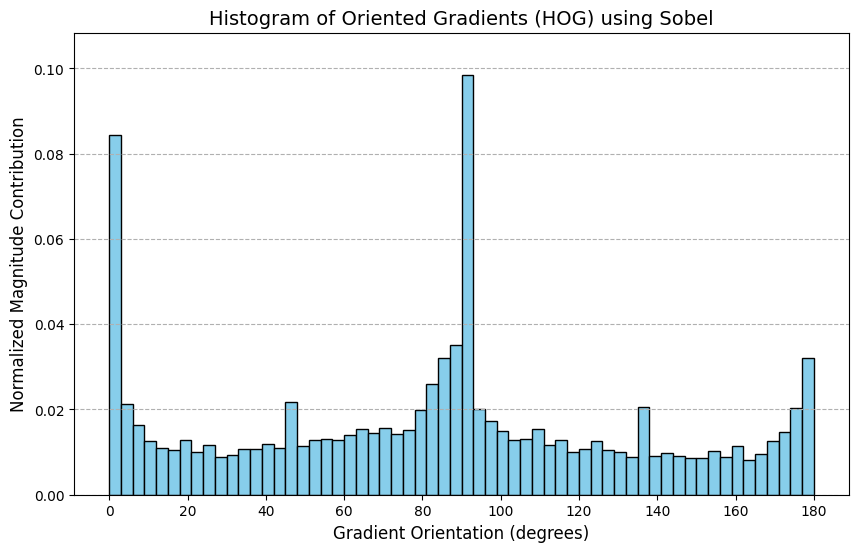

In [17]:
# determine histogram of gradients for the given image:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load grayscale image
img = cv2.imread('image.png', cv2.IMREAD_GRAYSCALE)

# Sobel gradients
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

# Magnitude and orientation
magnitude = np.sqrt(sobelx**2 + sobely**2)
orientation = np.rad2deg(np.arctan2(sobely, sobelx)) % 180  # [0,180)

# HOG parameters
num_bins = 60
bin_width = 180 // num_bins
hog_hist = np.zeros(num_bins)

# Build histogram
for i in range(num_bins):
    bin_start = i * bin_width
    bin_end = (i + 1) * bin_width
    mask = (orientation >= bin_start) & (orientation < bin_end)
    hog_hist[i] = np.sum(magnitude[mask])

# Normalize histogram
hog_hist /= (hog_hist.sum() + 1e-6)

# Plot histogram
plt.figure(figsize=(10,6)) # Increased figure size
plt.bar(np.arange(num_bins)*bin_width + bin_width/2, hog_hist,
        width=bin_width , align='center', color='skyblue', edgecolor='black') # Added color and edgecolor
plt.xticks(np.arange(0, 181, 20))
plt.title("Histogram of Oriented Gradients (HOG) using Sobel", fontsize=14) # Increased title font size
plt.xlabel("Gradient Orientation (degrees)", fontsize=12) # Increased xlabel font size
plt.ylabel("Normalized Magnitude Contribution", fontsize=12) # Increased ylabel font size
plt.grid(axis='y', linestyle='--') # Added horizontal grid lines
plt.ylim(0, max(hog_hist) * 1.1) # Added some padding above the highest bar
plt.show()

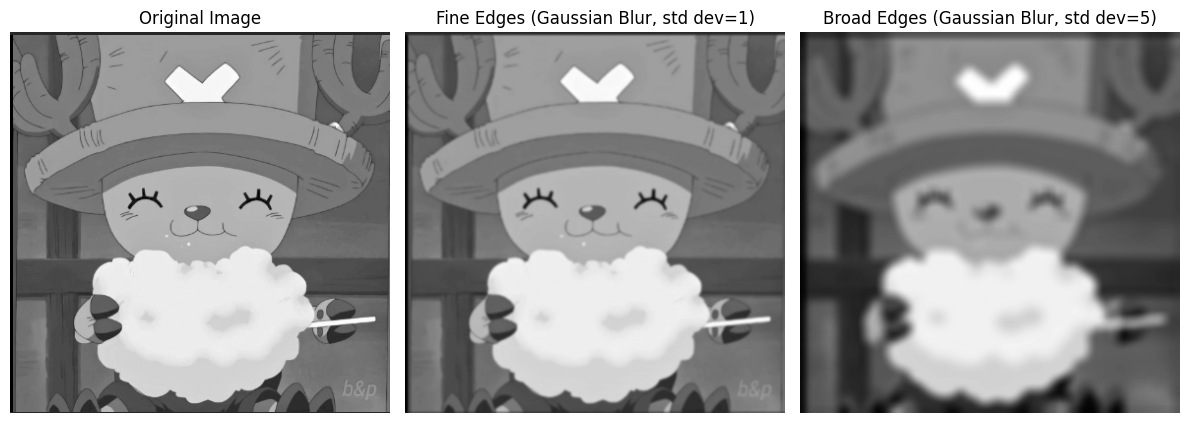

In [20]:
# Load the grayscale image
img = cv2.imread('image.png', cv2.IMREAD_GRAYSCALE)

# Apply Gaussian blur with different standard deviations
img_fine_edges = cv2.GaussianBlur(img, (5, 5), 1)  # Smaller std dev for fine edges
img_broad_edges = cv2.GaussianBlur(img, (15, 15), 5) # Larger std dev for broad edges

# Display the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_fine_edges, cmap='gray')
plt.title('Fine Edges (Gaussian Blur, std dev=1)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_broad_edges, cmap='gray')
plt.title('Broad Edges (Gaussian Blur, std dev=5)')
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# comment on the results before and after changing the parameters:

In [ ]:
# k = 0.02 to 0.08

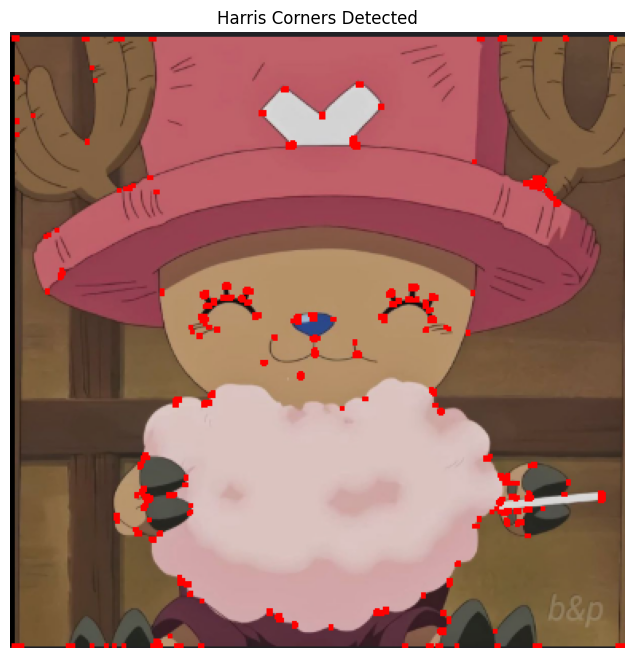

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
img = cv2.imread('/content/image.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Convert to float32 for Harris corner detector
gray = np.float32(gray)

# Apply the Harris corner detector
# blockSize: Size of a neighborhood considered for corner detection
# ksize: Aperture parameter of the Sobel derivative used
# k: Harris detector free parameter in the equation
dst = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.02)

# Result is dilated for marking the corners, not important
dst = cv2.dilate(dst, None)

# Threshold for an optimal value, it may vary depending on the image.
img[dst > 0.01 * dst.max()] = [0, 0, 255] # Mark corners in blue

# Display the result
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Harris Corners Detected')
plt.axis('off')
plt.show()